<h1>Chapter 1.4.12 Template Matching</h1>

In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [91]:
img = cv2.imread('./datasets/test1.png', 0)
img2 = img.copy()
template = cv2.imread('./datasets/test2.png', 0)

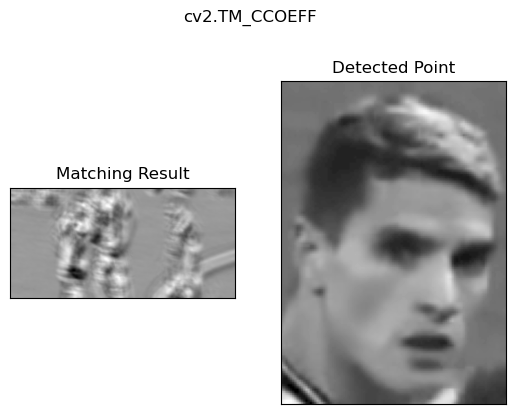

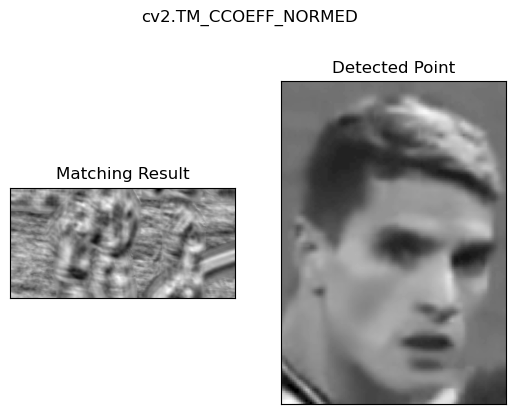

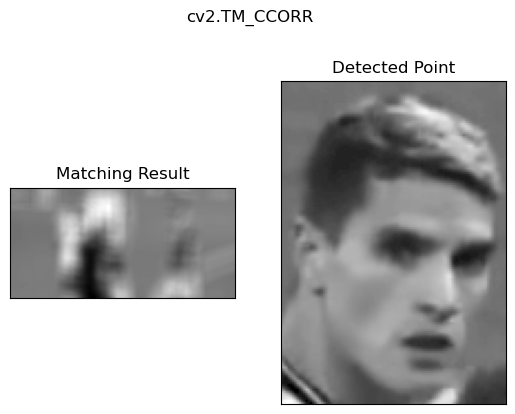

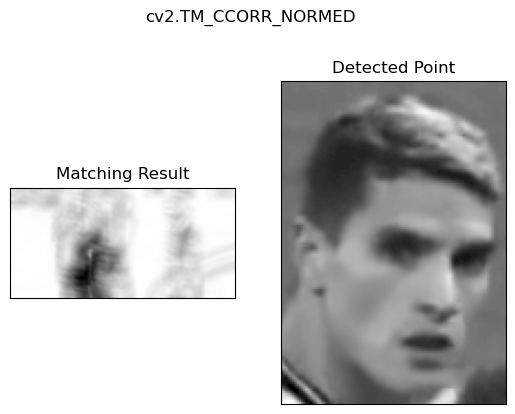

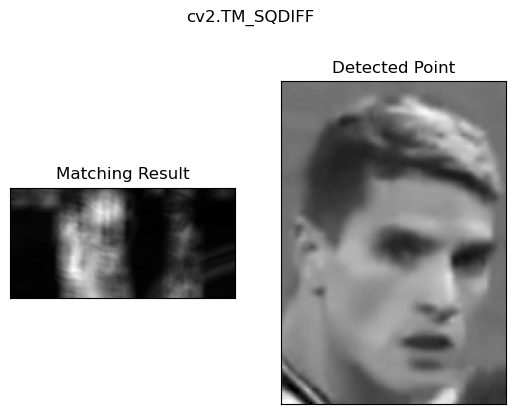

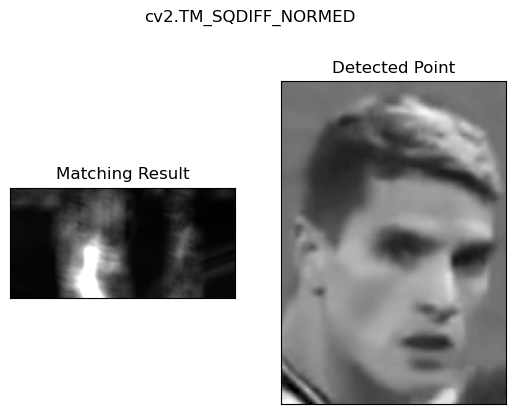

In [92]:
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
  img = img2.copy()
  method = eval(meth)

  # Apply template Matching
  res = cv2.matchTemplate(img,template,method) 
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv2.rectangle(img,top_left, bottom_right, 255, 2)

  plt.subplot(121),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)

  plt.show()

In [93]:
img_rgb = cv2.imread('./datasets/mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[164:212, 234:276]
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

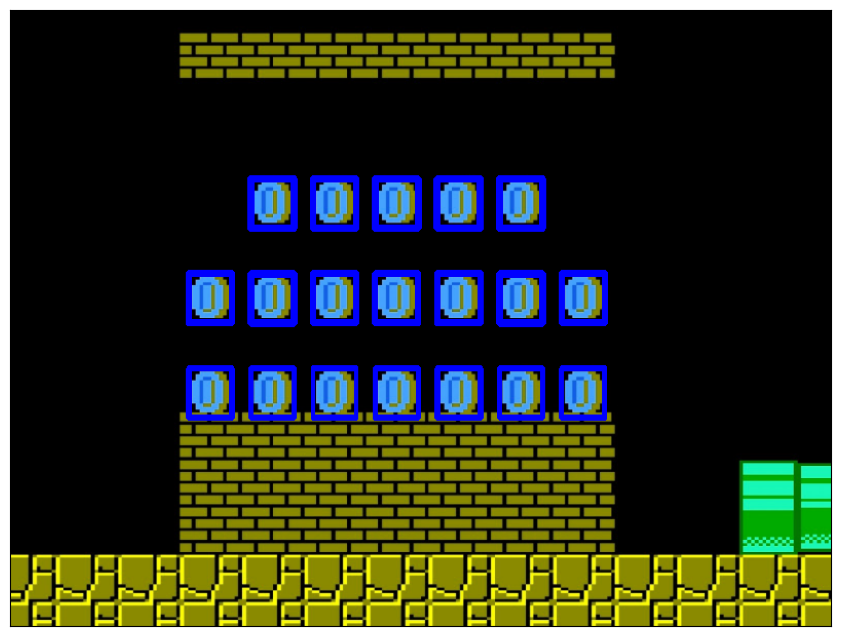

In [ ]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure(figsize=(24,8))
plt.xticks([]), plt.yticks([])
plt.imshow(img_rgb)